In [848]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from numpy.linalg import norm
import seaborn as sns
from math import e

In [849]:
def Normalize(x):
    x = (x - x.min() ) / (x.max() - x.min())
    return x

In [918]:
def load_data():
    df=pd.read_excel("seed.xlsx")
    df=df[['x3','x7','class']]
    cdf=df[df['class']<3]
    cdf_1=df[df['class'] == 1]
    cdf_2=df[df['class'] == 2]
    cdf_2=cdf_2.replace(to_replace = 2, value =0)
    g=cdf_1.append(cdf_2, ignore_index=True)
    train_x, test_x, train_y, test_y = ms.train_test_split(g[['x3','x7']],g['class'], train_size=0.7)
    return train_x, test_x, train_y, test_y

In [919]:
def Mse(y,y_hat):
    sub=y-y_hat
    mse_pow=np.power(sub, 2,dtype='float64')
    mse = np.mean(mse_pow)
    return mse

In [920]:
def sigmoid(x,theta,theta0):
    temp=np.dot(x,theta )+theta0
    y = 1 / (1 + np.exp(-temp))
    return y

In [921]:
def cost(y_hat,y,m):
    d=-1/m * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1-y_hat))
    return d

In [922]:
def LogisticRegression(x, y,alpha,itr): 
    m, n = x.shape
    theta=np.random.rand(n)
    theta0=0.001
    errors= []
    for i in range(itr):  
        y_hat = sigmoid(x,theta,theta0)
        error= cost(y_hat,y,m)
        errors.append(error)
        theta= theta - alpha*(1/m * np.dot(x.T, (y_hat - y)))
        theta0=theta0 - alpha* (1/m * np.sum(y_hat - y))
    errors = np.array(errors)    
    return theta,theta0,errors

In [923]:
train_x,test_x, train_y, test_y = load_data()
train_x=Normalize(np.asanyarray(train_x))
test_x=Normalize(np.asanyarray(test_x))
train_y=np.asanyarray(train_y)
test_y=np.asanyarray(test_y)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14628\4148855852.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  g=cdf_1.append(cdf_2, ignore_index=True)


In [924]:
theta,theta0,errors = LogisticRegression(train_x,train_y, 0.05,70000)

In [936]:
print('theta0: ',theta0)
print('theta1: ',theta[0])
print('theta2: ',theta[1])

theta0:  22.55000292540777
theta1:  0.10106886184755208
theta2:  -27.298907690551186


In [926]:
theta0

22.55000292540777

In [927]:
print("MSE Train = ", Mse(train_y,sigmoid(train_x,theta,theta0)))
print("MSE Test  = ",Mse( test_y,sigmoid(test_x,theta,theta0)))

MSE Train =  0.04957891020411598
MSE Test  =  0.022715285122802936


In [928]:
print('decision boundary formula:')
print( 'y ='+str(theta0) + ' + ' + str(theta[0]) + '*x1' +  ' + ' +str(theta[1]) + '*x2')

decision boundary formula:
y =22.55000292540777 + 0.10106886184755208*x1 + -27.298907690551186*x2


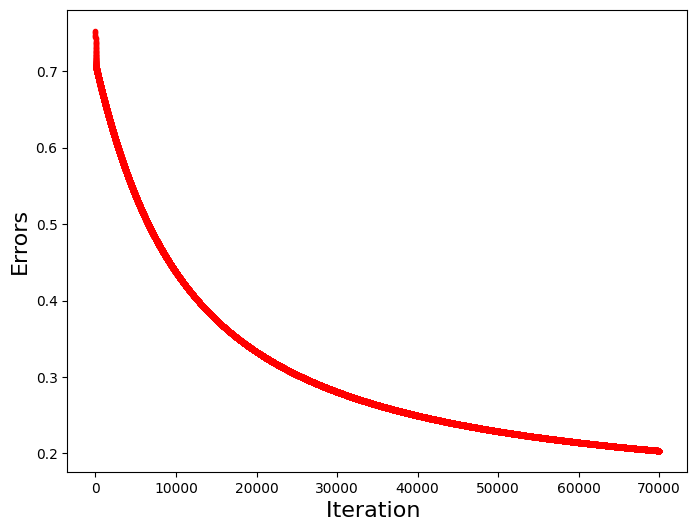

In [929]:
plt.figure(figsize=[8, 6])
plt.plot(errors, 'r.', linewidth=3.0)
plt.xlabel('Iteration ', fontsize=16)
plt.ylabel('Errors', fontsize=16)
plt.show()


In [930]:
def decision_boundary(x,theta,theta0):
    return - (theta0 + np.dot(theta[0], x)) / theta[1]

In [931]:
print('Decision boundary formula:')
print('-(' + str(theta0) + ' + ' + str(
    theta[0]) + '*x1) / (' + str(theta[1]) + '*x2)')

Decision boundary formula:
-(22.55000292540777 + 0.10106886184755208*x1) / (-27.298907690551186*x2)


In [932]:
y_hat_train =sigmoid(train_x,theta,theta0)
y_hat_train =[0 if y<=0.5 else 1 for y in y_hat_train ]
accuracy_train = np.sum(train_y == y_hat_train) / (train_y.shape[0])
print('Train accuracy:', accuracy_train)

Train accuracy: 0.9693877551020408


In [933]:
y_hat_test =sigmoid(test_x,theta,theta0)
y_hat_test =[0 if y<=0.5 else 1 for y in y_hat_test]
accuracy_test = np.sum(test_y == y_hat_test) / (test_y.shape[0])
print('Test accuracy:', accuracy_test)

Test accuracy: 1.0


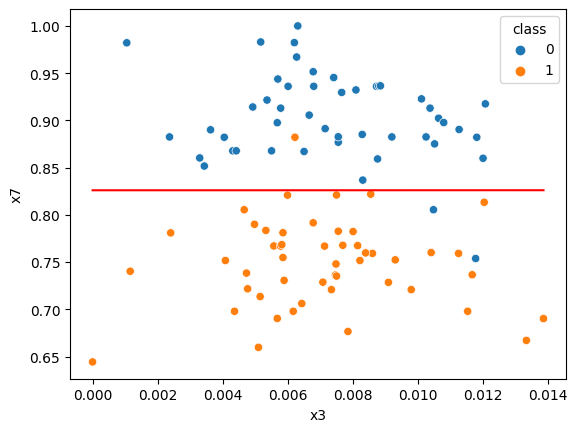

In [934]:
x_values = pd.DataFrame(data=train_x, columns=["x3", "x7"])
y_values = pd.DataFrame(data=train_y, columns=["class"])
result = pd.concat([x_values, y_values], axis=1, sort=False)
sns.scatterplot(x="x3", y="x7", hue='class', data=result)
x_values = [np.min(x_values.iloc[:, 0]), np.max(x_values.iloc[:, 0])]
y_values = decision_boundary(x_values,theta,theta0)
plt.plot(x_values, y_values, label='Decision Boundary', color='red')

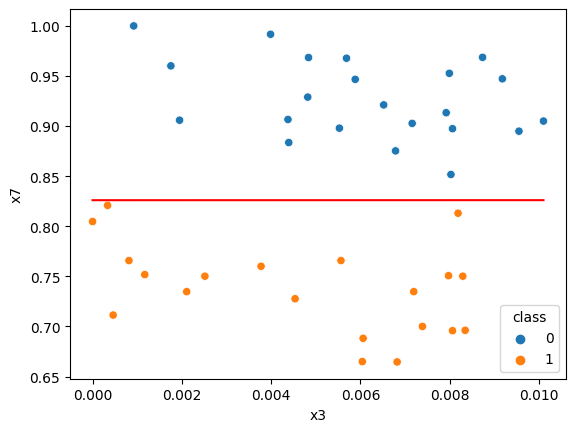

In [935]:
x_values = pd.DataFrame(data=test_x, columns=["x3", "x7"])
y_values = pd.DataFrame(data=test_y, columns=["class"])
result = pd.concat([x_values, y_values], axis=1, sort=False)
sns.scatterplot(x="x3", y="x7", hue='class', data=result)
x_values = [np.min(x_values.iloc[:, 0]), np.max(x_values.iloc[:, 0])]
y_values = decision_boundary(x_values,theta,theta0)
plt.plot(x_values, y_values, label='Decision Boundary', color='red')
